In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch 
from torch import nn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate the Data

In [4]:
X_train = np.linspace(-1, 1, 20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20,), (20,), (20,), (20,))

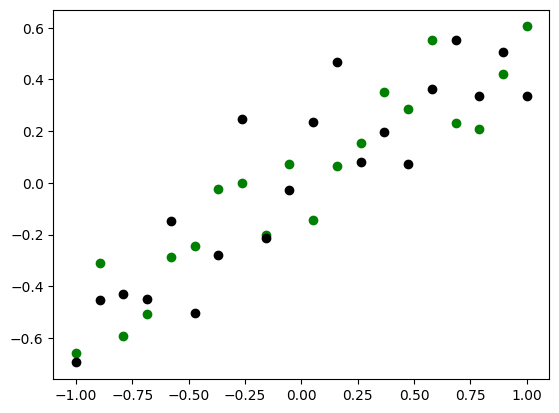

In [9]:
plt.scatter(X_train, y_train, c="g", label="Train Data")
plt.scatter(X_test, y_test, c="black", label="Test Data")
plt.show()

## Regression Model

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
class Dropout_reg(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model = Dropout_reg().to(device)

In [12]:
model

Dropout_reg(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [13]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

385

In [14]:
# loss and optimizer
loss_fc = nn.MSELoss()

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.01)

In [15]:
# turning data into tensors
X_train_ten = torch.from_numpy(X_train).type(torch.float)
y_train_ten = torch.from_numpy(y_train).type(torch.float)

X_test_ten = torch.from_numpy(X_test).type(torch.float)
y_test_ten = torch.from_numpy(y_train).type(torch.float)

In [16]:
X_train_ten = X_train_ten.view(-1, 1)
y_train_ten = y_train_ten.view(-1, 1)

X_test_ten = X_test_ten.view(-1, 1)
y_test_ten = y_test_ten.view(-1, 1)

In [17]:
X_train_ten.shape, y_train_ten.shape, X_test_ten.shape, y_test_ten.shape

(torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]),
 torch.Size([20, 1]))

In [18]:
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  y_pred = model(X_train_ten)
  loss = loss_fc(y_pred, y_train_ten)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_pred = model(X_test_ten)
    # calculate the loss/accuarcy
    test_loss = loss_fc(test_pred, y_test_ten)
  # lets print out what is happening
  if epoch % 10 == 0:
       epoch_count.append(epoch)
       train_loss_values.append(loss.detach().numpy())
       test_loss_values.append(test_loss.detach().numpy())
       print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.2777138352394104 | Validation Loss = 0.029765576124191284
Epoch: 10 | Loss: 0.055748891085386276 | Validation Loss = 0.030896291136741638
Epoch: 20 | Loss: 0.021922215819358826 | Validation Loss = 0.028428684920072556
Epoch: 30 | Loss: 0.019611310213804245 | Validation Loss = 0.016813399270176888
Epoch: 40 | Loss: 0.01759432628750801 | Validation Loss = 0.01779923215508461
Epoch: 50 | Loss: 0.01537072192877531 | Validation Loss = 0.015621128492057323
Epoch: 60 | Loss: 0.015024790540337563 | Validation Loss = 0.014905977062880993
Epoch: 70 | Loss: 0.014656422659754753 | Validation Loss = 0.01456810999661684
Epoch: 80 | Loss: 0.01423883717507124 | Validation Loss = 0.014205316081643105
Epoch: 90 | Loss: 0.013882247731089592 | Validation Loss = 0.013838499784469604
Epoch: 100 | Loss: 0.01350120734423399 | Validation Loss = 0.01346733421087265
Epoch: 110 | Loss: 0.013161890208721161 | Validation Loss = 0.013127828948199749
Epoch: 120 | Loss: 0.012843562290072441 | Valida

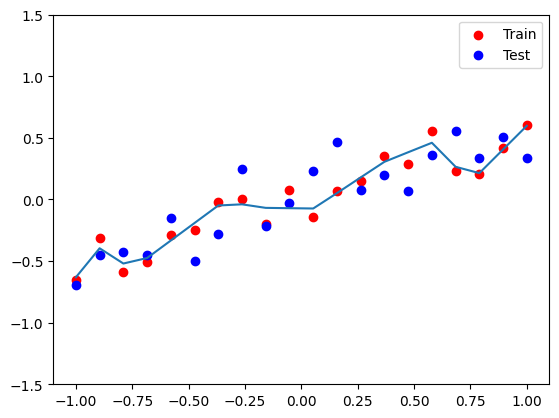

In [19]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred.detach().numpy())
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

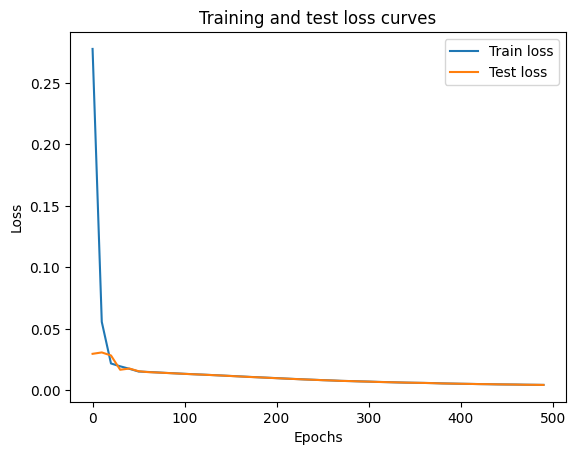

In [20]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [21]:
y_pred

tensor([[-0.6315],
        [-0.3961],
        [-0.5199],
        [-0.4751],
        [-0.3330],
        [-0.1909],
        [-0.0488],
        [-0.0394],
        [-0.0681],
        [-0.0707],
        [-0.0732],
        [ 0.0516],
        [ 0.1790],
        [ 0.3057],
        [ 0.3833],
        [ 0.4603],
        [ 0.2652],
        [ 0.2139],
        [ 0.4060],
        [ 0.5980]], grad_fn=<AddmmBackward0>)

## Dropout Model

In [62]:
class Dropout_reg_actual(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=1, out_features=128),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=128),
            nn.Dropout(p=0.1),
            nn.ReLU(),          
            nn.Linear(in_features=128, out_features=1),
            #nn.Dropout(p=0.2),
            # nn.ReLU(),          
            # nn.Linear(in_features=128, out_features=1)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model2 = Dropout_reg_actual().to(device)

In [63]:
model2

Dropout_reg_actual(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): Dropout(p=0.1, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [64]:
total_params = sum(
	param.numel() for param in model2.parameters()
)
total_params

16897

In [65]:
# loss and optimizer
loss_fc = nn.MSELoss()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [66]:
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model2.train()

  y_pred2 = model2(X_train_ten)
  loss = loss_fc(y_pred2, y_train_ten)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # scheduler.step()

  # testing
  model2.eval()
  with torch.inference_mode():

    # forward pass
    test_pred2 = model2(X_test_ten)
    # calculate the loss/accuarcy
    test_loss = loss_fc(test_pred2, y_test_ten)
      # lets print out what is happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.144286647439003 | Validation Loss = 0.11380468308925629
Epoch: 10 | Loss: 0.025300407782197 | Validation Loss = 0.022645536810159683
Epoch: 20 | Loss: 0.021504944190382957 | Validation Loss = 0.015917081385850906
Epoch: 30 | Loss: 0.02190588042140007 | Validation Loss = 0.015589931979775429
Epoch: 40 | Loss: 0.017016813158988953 | Validation Loss = 0.015669237822294235
Epoch: 50 | Loss: 0.014429450035095215 | Validation Loss = 0.014757220633327961
Epoch: 60 | Loss: 0.019916599616408348 | Validation Loss = 0.015613190829753876
Epoch: 70 | Loss: 0.020750977098941803 | Validation Loss = 0.014149504713714123
Epoch: 80 | Loss: 0.01610037125647068 | Validation Loss = 0.013792258687317371
Epoch: 90 | Loss: 0.016398021951317787 | Validation Loss = 0.01406300812959671
Epoch: 100 | Loss: 0.015471205115318298 | Validation Loss = 0.014042137190699577
Epoch: 110 | Loss: 0.015308517031371593 | Validation Loss = 0.012713270261883736
Epoch: 120 | Loss: 0.014412375167012215 | Validat

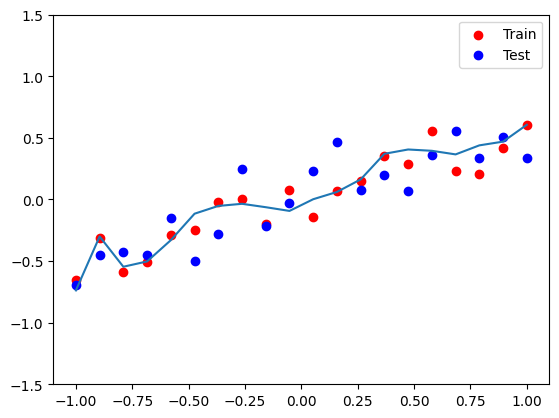

In [67]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred2.detach().numpy())
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [68]:
y_pred2

tensor([[-0.7382],
        [-0.3006],
        [-0.5460],
        [-0.5029],
        [-0.3302],
        [-0.1155],
        [-0.0524],
        [-0.0351],
        [-0.0627],
        [-0.0929],
        [ 0.0020],
        [ 0.0611],
        [ 0.1629],
        [ 0.3707],
        [ 0.4058],
        [ 0.3951],
        [ 0.3659],
        [ 0.4393],
        [ 0.4696],
        [ 0.6062]], grad_fn=<AddmmBackward0>)

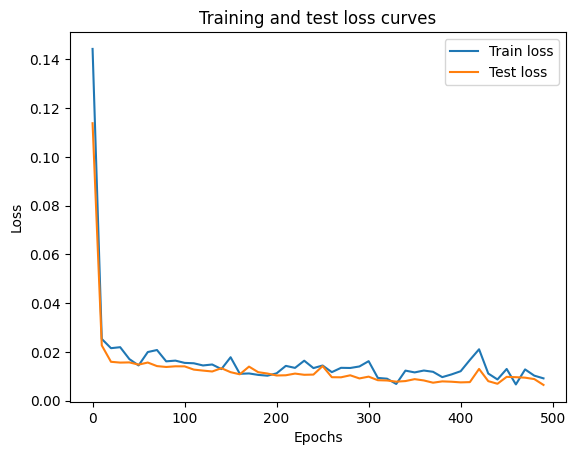

In [69]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()